In [1]:
# Imports:
from math import acos, ceil, cos, exp, floor, log10, pi, sin, sqrt, log
from operator import ior
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve
from scipy.interpolate import interp2d
# My class:
from coil import Coil
# fonts
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 17}

matplotlib.rc('font', **font)
import os



In [15]:
def runFreqCoilN(n):
    ########## Plotting equation 10 in Part II
    # vary dwire - fix coil diameter, length, different n values do it in meters!
    freq_v = np.linspace(50e6,950e6,500)
    re = np.array([])
    rm = np.array([])
    resimple = np.array([])
    
    # coil parameters:
    dcoil = .00114
    lcoil = .00216
    dw = .00011
    rho = 1.72e-8
    alpha = .001
    beta = .002
    sigma = 1
    tc = 293
    ts = 293  
    
    for f in freq_v:
        # (self, n, dcoil, lcoil, dwire, f, rho, alpha, beta, sigma,tc,ts)
        c = Coil(n,dcoil,lcoil,dw,f,rho,alpha,beta,sigma,tc,ts)
        
        re = np.append(re,c.RsampleDielectric())
        rm = np.append(rm,c.RsampleMagnetic())
        resimple = np.append(resimple,c.RsampleDielectricSimple())

    
    return re, rm, freq_v, resimple

def runFreqCoilN_figure(n):
    ########## Plotting equation 10 in Part II
    # vary dwire - fix coil diameter, length, different n values do it in meters!
    freq_v = np.linspace(50e6,950e6,500)
    re = np.array([])
    rm = np.array([])
    resimple = np.array([])
    
    # coil parameters:
    dcoil = .003
    lcoil = .001
    dw = .0004
    rho = 1.72e-8
    alpha = .0025
    beta = .002
    sigma = 1
    tc = 293
    ts = 293  
    
    for f in freq_v:
        # (self, n, dcoil, lcoil, dwire, f, rho, alpha, beta, sigma,tc,ts)
        c = Coil(n,dcoil,lcoil,dw,f,rho,alpha,beta,sigma,tc,ts)
        
        re = np.append(re,c.RsampleDielectric())
        rm = np.append(rm,c.RsampleMagnetic())
        resimple = np.append(resimple,c.RsampleDielectricSimple())

    
    return re, rm, freq_v, resimple


(0.0, 60.0)

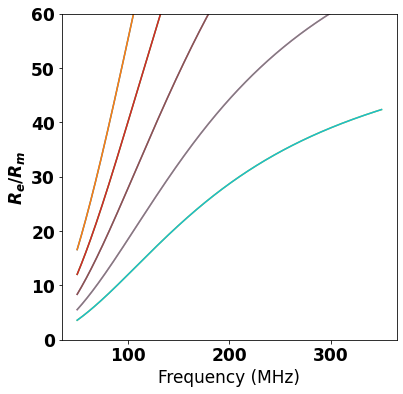

In [9]:
# recreate figure 9 in solenoidal microcoil design part 2:
plt.figure(figsize=(6,6))
re,rm, freq_v,res = runFreqCoilN(12)
r12 = np.divide(re,rm)
r12s = np.divide(res,rm)
plt.plot(freq_v/1e6, r12s)
plt.plot(freq_v/1e6, r12)

re,rm,freq_v,res = runFreqCoilN(10)
r10 = np.divide(re,rm)
r10s = np.divide(res,rm)
plt.plot(freq_v/1e6, r10s)
plt.plot(freq_v/1e6, r10)

re,rm,freq_v,res = runFreqCoilN(8)
r8 = np.divide(re,rm)
r8s = np.divide(res,rm)
plt.plot(freq_v/1e6, r8s)
plt.plot(freq_v/1e6, r8)

re,rm,freq_v,res = runFreqCoilN(6)
r6 = np.divide(re,rm)
r6s = np.divide(res,rm)
plt.plot(freq_v/1e6, r6s)
plt.plot(freq_v/1e6, r6)

re,rm,freq_v,res = runFreqCoilN(4)
r4 = np.divide(re,rm)
r4s = np.divide(res,rm)
plt.plot(freq_v/1e6, r4s)
plt.plot(freq_v/1e6, r4)

plt.xlabel('Frequency (MHz)')
plt.ylabel('$R_e/R_m$')
plt.ylim([0,60])

#


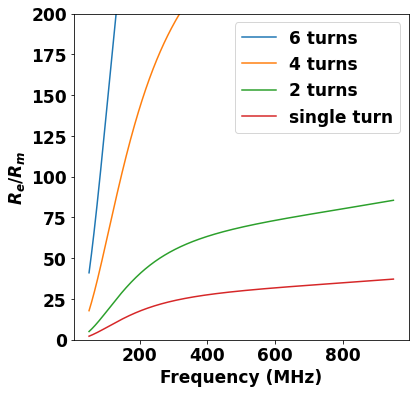

: 

In [21]:
# recreate figure 9 in solenoidal microcoil design part 2:
plt.figure(figsize=(6,6))

re,rm,freq_v,res = runFreqCoilN_figure(6)
r6 = np.divide(re,rm)
r6s = np.divide(res,rm)
plt.plot(freq_v/1e6, r6s,label='6 turns')
#plt.plot(freq_v/1e6, r6)

re,rm,freq_v,res = runFreqCoilN_figure(4)
r4 = np.divide(re,rm)
r4s = np.divide(res,rm)
plt.plot(freq_v/1e6, r4s,label='4 turns')

re,rm,freq_v,res = runFreqCoilN_figure(2)
r2 = np.divide(re,rm)
r2s = np.divide(res,rm)
plt.plot(freq_v/1e6, r2s,label='2 turns')
#plt.plot(freq_v/1e6, r4)

re,rm,freq_v,res = runFreqCoilN_figure(1)
r1 = np.divide(re,rm)
r1s = np.divide(res,rm)
plt.plot(freq_v/1e6, r1s,label='single turn')

plt.xlabel('Frequency (MHz)',fontweight='bold')
plt.ylabel('$R_e/R_m$')
plt.ylim([0,200])
plt.legend()